-138.18131470334023
-137.26132856810582
-136.3445296442989
-135.43093236311157
-134.52051804076748
-133.61331858001407
-132.70931086191084
-131.80850018854744
-130.9108900270319
-130.0164943548843
-129.12528881969362
-128.23727928517798
-127.35247694947813
-126.47088105478669
-125.59248701233518
-124.71730086667014
-123.845317250964
-122.97653626413685
-122.11096661615044
-121.24860190049543
-120.38944453014908
-119.53349808379724
-118.68075827840707
-117.831227555424
-116.98490816303112
-116.14179971810557
-115.30190268289574
-114.46521782630083
-113.63174885688993
-112.80149104218313
-111.97444859109228
-111.150619721862
-110.33000810581939
-109.51261296627688
-108.69843437217627
-107.88747498164769
-107.07973234663122
-106.27520991476958
-105.47390775113274
-104.67582617647427
-103.88096570027012
-103.08932815786297
-102.30091267246408
-101.51572117272127
-100.73375433217174
-99.95501206361742
-99.17949566819009
-98.40720577427847
-97.63814310146277
-96.8723084588364
-96.10970249821

-1.502847355765926
-1.503133669459256
-1.5034206247159123
-1.5037082201066985
-1.5039964542104745
-1.504285325614037
-1.5045748329119957
-1.5048649747066651
-1.5051557496079468
-1.505447156233219
-1.505739193207228
-1.5060318591619832
-1.5063251527366512
-1.506619072577453
-1.5069136173375652
-1.5072087856770224
-1.5075045762626185
-1.5078009877678147
-1.5080980188726465
-1.5083956682636328
-1.5086939346336867
-1.5089928166820303
-1.5092923131141072
-1.5095924226415014
-1.509893143981854
-1.5101944758587813
-1.5104964170018
-1.5107989661462469
-1.5111021220332046
-1.5114058834094255
-1.5117102490272625
-1.5120152176445945
-1.5123207880247598
-1.5126269589364818
-1.5129337291538087
-1.5132410974560435
-1.513549062627679
-1.5138576234583374
-1.5141667787427044
-1.5144765272804703
-1.5147868678762704
-1.5150977993396262
-1.5154093204848853
-1.5157214301311692
-1.5160341271023132
-1.5163474102268162
-1.5166612783377846
-1.51697573027288
-1.5172907648742695
-1.517606380988574
-1.51792257746

-1.8477877141482948
-1.8483390565057811
-1.8488905560322715
-1.8494422124094816
-1.8499940253195706
-1.8505459944451423
-1.851098119469241
-1.851650400075355
-1.8522028359474134
-1.8527554267697843
-1.8533081722272782
-1.8538610720051452
-1.8544141257890738
-1.8549673332651904
-1.8555206941200602
-1.8560742080406858
-1.8566278747145033
-1.8571816938293897
-1.857735665073654
-1.8582897881360394
-1.8588440627057277
-1.8593984884723302
-1.8599530651258926
-1.8605077923568945
-1.8610626698562422
-1.8616176973152794
-1.8621728744257757
-1.8627282008799373
-1.8632836763703915
-1.8638393005901999
-1.8643950732328518
-1.864950993992262
-1.8655070625627754
-1.8660632786391604
-1.866619641916615
-1.8671761520907573
-1.8677328088576346
-1.868289611913719
-1.8688465609559022
-1.8694036556815017
-1.8699608957882565
-1.8705182809743288
-1.8710758109383003
-1.8716334853791743
-1.8721913039963756
-1.8727492664897425
-1.8733073725595437
-1.8738656219064553
-1.874424014231577
-1.8749825492364216
-1.8755

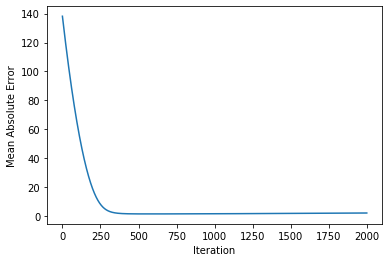

RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 1 - REAL: 1
RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 1 - REAL: 1
RESULT: 1 - REAL: 1
RESULT: 1 - REAL: 1


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, dataFilePath, outputPath, alpha=0.01, maxIter=500, threshold=0.5, 
        errorThreshold = 0.001):
        self.dataFilePath = dataFilePath
        self.outputPath   = outputPath
        self.alpha        = alpha
        self.maxIter      = maxIter
        self.errorThreshold = errorThreshold
        self.threshold      = threshold

        self.loadDataFromFile()
        self.initWeights()

    def loadDataFromFile(self):
        datasetLoaded = np.loadtxt(self.dataFilePath, delimiter=",")
        self.nExamples = datasetLoaded.shape[0]
        self.nAttributes = len(datasetLoaded[0])
        
        self.dataset = np.ones(shape=(self.nExamples, self.nAttributes))
        self.dataset[:, 1:] = datasetLoaded[:,:-1]
        self.target         = datasetLoaded[:,-1]
        self.target.shape   = (self.nExamples, 1)

    def initWeights(self):
        # THETA = [THETA0, THETA1, THETA2, ... , THETA9] - transposto
        self.weights = np.zeros(shape=(self.nAttributes, 1))
        for i in range(0, self.nAttributes):
            self.weights[i][0] = random.random()

    def sigmoidFunction(self):
        linearFunction = self.dataset.dot(self.weights) # THETA(t) * x
        sigmoidFunction = (1.0/(1 + np.exp(-linearFunction)))
        return sigmoidFunction

    def calculateCost(self):
        output = self.sigmoidFunction()
        cost = self.target * np.log(output) + np.log(1 - output) * np.log(1 - output)
        cost = -np.average(cost)
        return cost

    def calculateError(self):
        output = self.sigmoidFunction()
        error = output - self.target
        return error
        
    def gradientDescent(self):
        error = self.calculateError()
        for i in range(self.nAttributes):
            temp = self.dataset[:,i]
            temp.shape = (self.nExamples, 1)
            currentErrors = error * temp
            self.weights[i][0] = self.weights[i][0] - self.alpha * (1.0/self.nExamples) * currentErrors.sum()

    def classifyData(self, originalPoint):
        originalPoint.insert(0,1)
        point = np.array(originalPoint)
        linearFunction = point.dot(self.weights)
        sigmoidFunction = (1.0 / (1 + np.exp(-linearFunction)))
        
        if sigmoidFunction >= self.threshold:
            output = 1
        else:
            output = 0
        
        return output

    def plotCostGraph(self, errorsList):

        xAxisValues = range(0, self.maxIter + 1)
        plt.plot(xAxisValues, errorsList)
        plt.xlabel("Iteration")
        plt.ylabel("Mean Absolute Error")
        plt.savefig(self.outputPath + "/error_logreg.png")
        plt.show()

    
    def run(self):
        cost = self.calculateCost()
        count = 0
        errors = list()
        errors.append(abs(cost))
        print(cost)
        
        while abs(cost) > self.errorThreshold and count < self.maxIter:
            self.gradientDescent()
            count += 1
            cost = self.calculateCost()
            errors.append(abs(cost))
            print(cost)
        
        print(self.weights)
        self.plotCostGraph(errors)
        

if __name__ == '__main__':
    logReg = LogisticRegression("D:/Nextcloud/UFMS/Aulas/2020-1/IA/codigos/bcw/breast-cancer-wisconsin-modified.csv",
                                "D:/Nextcloud/UFMS/Aulas/2020-1/IA/codigos/bcw",
                                maxIter = 2000, threshold = 0.5, alpha = 0.001)
    logReg.run()

    data_to_classify = [[1,1,1,1,2,1,1,1,8,0],[1,1,1,3,2,1,1,1,1,0],[5,10,10,5,4,5,4,4,1,1],[3,1,1,1,2,1,1,1,1,0],[3,1,1,1,2,1,2,1,2,0],[3,1,1,1,3,2,1,1,1,0],
                        [2,1,1,1,2,1,1,1,1,0],[5,10,10,3,7,3,8,10,2,1],[4,8,6,4,3,4,10,6,1,1],[4,8,8,5,4,5,10,4,1,1]]
    count = 1
    for data in data_to_classify:
        result_class = logReg.classifyData(data[:-1])
        print("RESULT: " + str(result_class) + " - REAL: " + str(data[-1]))